In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import required datasets
df1 = pd.read_csv("cleaned_data.csv")
df2 = pd.read_csv("airports.csv")

In [4]:
df1.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12


In [5]:
df2.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [6]:
df2.shape

(3376, 7)

In [7]:
#select only required columns
df1 = df1[['Year','Month','Origin','Dest']]
df2 = df2[['iata','state']]

In [8]:
#rename the iata column
df2 = df2.rename({'iata':'Origin'}, axis = 1)

In [9]:
#merge the datasets
q3 = pd.merge(df1, df2, how = "inner", on = "Origin")
q3.head()

,Year,Month,Origin,Dest,state
0,2006,1,ATL,PHX,GA
1,2006,1,ATL,PHX,GA
2,2006,1,ATL,PHX,GA
3,2006,1,ATL,DCA,GA
4,2006,1,ATL,DCA,GA


In [10]:
q3=q3.dropna() #all nan values removed

In [11]:
q3.isnull().sum()

Year      0
Month     0
Origin    0
Dest      0
state     0
dtype: int64

In [12]:
q3['Origin-Dest'] = q3['Origin'].astype(str)+'-'+q3['Dest'].astype(str)
q3.head()

,Year,Month,Origin,Dest,state,Origin-Dest
0,2006,1,ATL,PHX,GA,ATL-PHX
1,2006,1,ATL,PHX,GA,ATL-PHX
2,2006,1,ATL,PHX,GA,ATL-PHX
3,2006,1,ATL,DCA,GA,ATL-DCA
4,2006,1,ATL,DCA,GA,ATL-DCA


In [35]:
#splitting years according to quarters 
q3_2006 = q3.loc[q3['Year']==2006]
q3_2007 = q3.loc[q3['Year']==2007]

In [14]:
q3.shape

(14258968, 6)

In [15]:
q3.shape

(14258968, 6)

In [16]:
q3_2006.shape

(6992409, 6)

In [17]:
q3_2007.shape

(7266559, 6)

In [36]:
q3_2006['Quarter'] = q3_2006['Month'].apply(lambda x:
                                           '2006_Q1' if x>=1 and x<=3 else
                                            '2006_Q2' if x>=3 and x<=6 else
                                             '2006_Q3' if x>=6 and x<=9 else
                                               '2006_Q4' if x>=9 and x<=12 else 'none')

In [37]:
q3_2007['Quarter'] = q3_2007['Month'].apply(lambda x:
                                           '2007_Q1' if x>=1 and x<=3 else
                                            '2007_Q2' if x>=3 and x<=6 else
                                             '2007_Q3' if x>=6 and x<=9 else
                                               '2007_Q4' if x>=9 and x<=12 else 'none')

In [39]:
q3_2006.head()

,Year,Month,Origin,Dest,state,Origin-Dest,Quarter
0,2006,1,ATL,PHX,GA,ATL-PHX,2006_Q1
1,2006,1,ATL,PHX,GA,ATL-PHX,2006_Q1
2,2006,1,ATL,PHX,GA,ATL-PHX,2006_Q1
3,2006,1,ATL,DCA,GA,ATL-DCA,2006_Q1
4,2006,1,ATL,DCA,GA,ATL-DCA,2006_Q1


In [40]:
q3_2007.head()

,Year,Month,Origin,Dest,state,Origin-Dest,Quarter
396693,2007,1,ATL,IAH,GA,ATL-IAH,2007_Q1
396694,2007,1,ATL,CLE,GA,ATL-CLE,2007_Q1
396695,2007,1,ATL,CLE,GA,ATL-CLE,2007_Q1
396696,2007,1,ATL,IAH,GA,ATL-IAH,2007_Q1
396697,2007,1,ATL,CLE,GA,ATL-CLE,2007_Q1


In [50]:
q33 =  pd.concat([q3_2006,q3_2007])

In [53]:
q33.head()

,Year,Month,Origin,Dest,state,Origin-Dest,Quarter
0,2006,1,ATL,PHX,GA,ATL-PHX,2006_Q1
1,2006,1,ATL,PHX,GA,ATL-PHX,2006_Q1
2,2006,1,ATL,PHX,GA,ATL-PHX,2006_Q1
3,2006,1,ATL,DCA,GA,ATL-DCA,2006_Q1
4,2006,1,ATL,DCA,GA,ATL-DCA,2006_Q1


In [55]:
#3. How does the number of people flying between different locations change over time?
q33.shape

(14258968, 7)

In [70]:
q1_2006 = q33[q33['Quarter']=='2006_Q1']
q2_2006 = q33[q33['Quarter']=='2006_Q2']
q3_2006 = q33[q33['Quarter']=='2006_Q3']
q4_2006 = q33[q33['Quarter']=='2006_Q4']

In [71]:
q1_2007 = q33[q33['Quarter']=='2007_Q1']
q2_2007 = q33[q33['Quarter']=='2007_Q2']
q3_2007 = q33[q33['Quarter']=='2007_Q3']
q4_2007 = q33[q33['Quarter']=='2007_Q4']          

In [118]:
quarter1_2006=pd.DataFrame(q1_2006['Origin-Dest'].value_counts())
quarter1_2006 = quarter1_2006.reset_index()
quarter1_2006 = quarter1_2006.rename({'index':'Origin-Dest','Origin-Dest':'2006Q1'}, axis = 1)
quarter1_2006

,Origin-Dest,2006Q1
0,LAX-SAN,3635
1,SAN-LAX,3633
2,LAS-LAX,3185
3,LAX-LAS,3118
4,LGA-BOS,2983
...,...,...
4219,LIT-XNA,1
4220,JAN-MSY,1
4221,PIT-IND,1
4222,AVP-JFK,1


In [117]:
quarter2_2006=pd.DataFrame(q2_2006['Origin-Dest'].value_counts())
quarter2_2006 = quarter2_2006.reset_index()
quarter2_2006 = quarter2_2006.rename({'index':'Origin-Dest','Origin-Dest':'2006Q2'}, axis = 1)
quarter2_2006

,Origin-Dest,2006Q2
0,LAX-SAN,3612
1,SAN-LAX,3611
2,LAX-LAS,3399
3,HNL-OGG,3290
4,OGG-HNL,3285
...,...,...
4328,SAN-IPL,1
4329,JFK-TYS,1
4330,JFK-LEX,1
4331,JFK-LGA,1


In [116]:
quarter3_2006=pd.DataFrame(q3_2006['Origin-Dest'].value_counts())
quarter3_2006 = quarter3_2006.reset_index()
quarter3_2006 = quarter3_2006.rename({'index':'Origin-Dest','Origin-Dest':'2006Q3'}, axis = 1)
quarter3_2006

,Origin-Dest,2006Q3
0,OGG-HNL,4603
1,HNL-OGG,4603
2,LIH-HNL,3779
3,HNL-LIH,3690
4,LAX-SAN,3654
...,...,...
4173,TPA-PDX,1
4174,BGR-PWM,1
4175,ORD-MDW,1
4176,PDX-MSO,1


In [115]:
quarter4_2006=pd.DataFrame(q4_2006['Origin-Dest'].value_counts())
quarter4_2006 = quarter4_2006.reset_index()
quarter4_2006 = quarter4_2006.rename({'index':'Origin-Dest','Origin-Dest':'2006Q4'}, axis = 1)
quarter4_2006

,Origin-Dest,2006Q4
0,OGG-HNL,4091
1,HNL-OGG,4080
2,LAX-LAS,3461
3,LIH-HNL,3449
4,LAX-SAN,3378
...,...,...
4238,LIT-CVG,1
4239,SWF-JFK,1
4240,LGA-JFK,1
4241,JFK-SWF,1


In [114]:
#for 2007 
quarter1_2007=pd.DataFrame(q1_2007['Origin-Dest'].value_counts())
quarter1_2007 = quarter1_2007.reset_index()
quarter1_2007 = quarter1_2007.rename({'index':'Origin-Dest','Origin-Dest':'2007Q1'}, axis = 1)
quarter1_2007

,Origin-Dest,2007Q1
0,OGG-HNL,4021
1,HNL-OGG,3899
2,LAX-LAS,3471
3,LAS-LAX,3300
4,HNL-LIH,3296
...,...,...
4462,MDT-JFK,1
4463,MKE-LAS,1
4464,AZO-MKE,1
4465,MSP-PIA,1


In [113]:
quarter2_2007=pd.DataFrame(q2_2007['Origin-Dest'].value_counts())
quarter2_2007 = quarter2_2007.reset_index()
quarter2_2007 = quarter2_2007.rename({'index':'Origin-Dest','Origin-Dest':'2007Q2'}, axis = 1)
quarter2_2007

,Origin-Dest,2007Q2
0,OGG-HNL,3949
1,HNL-OGG,3941
2,LAX-LAS,3548
3,LAS-LAX,3405
4,HNL-LIH,3242
...,...,...
4750,CVG-EGE,1
4751,MSP-JAC,1
4752,SDF-LAX,1
4753,MCO-SAN,1


In [112]:
quarter3_2007=pd.DataFrame(q3_2007['Origin-Dest'].value_counts())
quarter3_2007 = quarter3_2007.reset_index()
quarter3_2007 = quarter3_2007.rename({'index':'Origin-Dest','Origin-Dest':'2007Q3'}, axis = 1)
quarter3_2007

,Origin-Dest,2007Q3
0,HNL-OGG,4047
1,OGG-HNL,4041
2,LAX-LAS,3581
3,LAS-LAX,3456
4,HNL-LIH,3320
...,...,...
4631,SRQ-IAH,1
4632,SRQ-MIA,1
4633,IAD-BWI,1
4634,ORD-ROW,1


In [111]:
quarter4_2007=pd.DataFrame(q4_2007['Origin-Dest'].value_counts())
quarter4_2007 = quarter4_2007.reset_index()
quarter4_2007 = quarter4_2007.rename({'index':'Origin-Dest','Origin-Dest':'2007Q4'}, axis = 1)
quarter4_2007

,Origin-Dest,2007Q4
0,OGG-HNL,3909
1,HNL-OGG,3825
2,LAX-LAS,3520
3,LAS-LAX,3414
4,HNL-LIH,3235
...,...,...
4658,CVG-SMF,1
4659,FAT-BOI,1
4660,CVG-PFN,1
4661,GSO-IAD,1


In [146]:
#merging the dataframes respectively
firsthalf2006 = pd.merge(quarter1_2006,quarter2_2006, on = 'Origin-Dest' , how = 'inner')
secondhalf2006 = pd.merge(quarter3_2006,quarter4_2006, on = 'Origin-Dest' , how = 'inner')


In [147]:
full2006 = pd.merge(firsthalf2006,secondhalf2006,on='Origin-Dest',how='inner')
full2006

,Origin-Dest,2006Q1,2006Q2,2006Q3,2006Q4
0,LAX-SAN,3635,3612,3654,3378
1,SAN-LAX,3633,3611,3645,3367
2,LAS-LAX,3185,3225,3212,3290
3,LAX-LAS,3118,3399,3395,3461
4,LGA-BOS,2983,3018,2933,2894
...,...,...,...,...,...
3838,CLE-SEA,2,60,93,19
3839,MEM-OKC,1,20,81,87
3840,IAH-ANC,1,46,113,17
3841,RIC-BOS,1,169,184,181


In [148]:
firsthalf2007 = pd.merge(quarter1_2007,quarter2_2007, on = 'Origin-Dest' , how = 'inner')
secondhalf2007 = pd.merge(quarter3_2007,quarter4_2007, on = 'Origin-Dest' , how = 'inner')

In [149]:
full2007 = pd.merge(firsthalf2007,secondhalf2007,on='Origin-Dest' , how = 'inner')
full2007

,Origin-Dest,2007Q1,2007Q2,2007Q3,2007Q4
0,OGG-HNL,4021,3949,4041,3909
1,HNL-OGG,3899,3941,4047,3825
2,LAX-LAS,3471,3548,3581,3520
3,LAS-LAX,3300,3405,3456,3414
4,HNL-LIH,3296,3242,3320,3235
...,...,...,...,...,...
4156,ORF-JFK,1,139,172,62
4157,ACY-LGA,1,5,6,2
4158,CVG-MSY,1,81,81,80
4159,MSY-CVG,1,80,80,80


In [150]:
all_quarters = pd.merge(full2006,full2007, on = 'Origin-Dest')
all_quarters

,Origin-Dest,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,2007Q3,2007Q4
0,LAX-SAN,3635,3612,3654,3378,3265,2907,3207,3224
1,SAN-LAX,3633,3611,3645,3367,3259,2906,3203,3216
2,LAS-LAX,3185,3225,3212,3290,3300,3405,3456,3414
3,LAX-LAS,3118,3399,3395,3461,3471,3548,3581,3520
4,LGA-BOS,2983,3018,2933,2894,2801,2939,2916,2791
...,...,...,...,...,...,...,...,...,...
3714,CLE-SEA,2,60,93,19,7,59,92,90
3715,MEM-OKC,1,20,81,87,247,270,272,260
3716,IAH-ANC,1,46,113,17,7,78,144,18
3717,RIC-BOS,1,169,184,181,142,151,183,165


In [151]:
#for the construction of the heat plot lets take the top 20 Locations travelled 
top_20 = all_quarters.head(20)
top_20

,Origin-Dest,2006Q1,2006Q2,2006Q3,2006Q4,2007Q1,2007Q2,2007Q3,2007Q4
0,LAX-SAN,3635,3612,3654,3378,3265,2907,3207,3224
1,SAN-LAX,3633,3611,3645,3367,3259,2906,3203,3216
2,LAS-LAX,3185,3225,3212,3290,3300,3405,3456,3414
3,LAX-LAS,3118,3399,3395,3461,3471,3548,3581,3520
4,LGA-BOS,2983,3018,2933,2894,2801,2939,2916,2791
5,BOS-LGA,2977,3010,2928,2889,2800,2949,2925,2783
6,DCA-LGA,2939,2912,2854,2814,2644,2762,2748,2635
7,LGA-DCA,2933,2918,2850,2808,2671,2775,2746,2624
8,LAX-PHX,2909,2775,2760,2735,2687,2662,2865,2714
9,PHX-LAX,2828,2952,2942,2918,2858,2823,3046,2885


In [152]:
#to construct the heat plot 
top_20 = top_20.set_index(['Origin-Dest'])

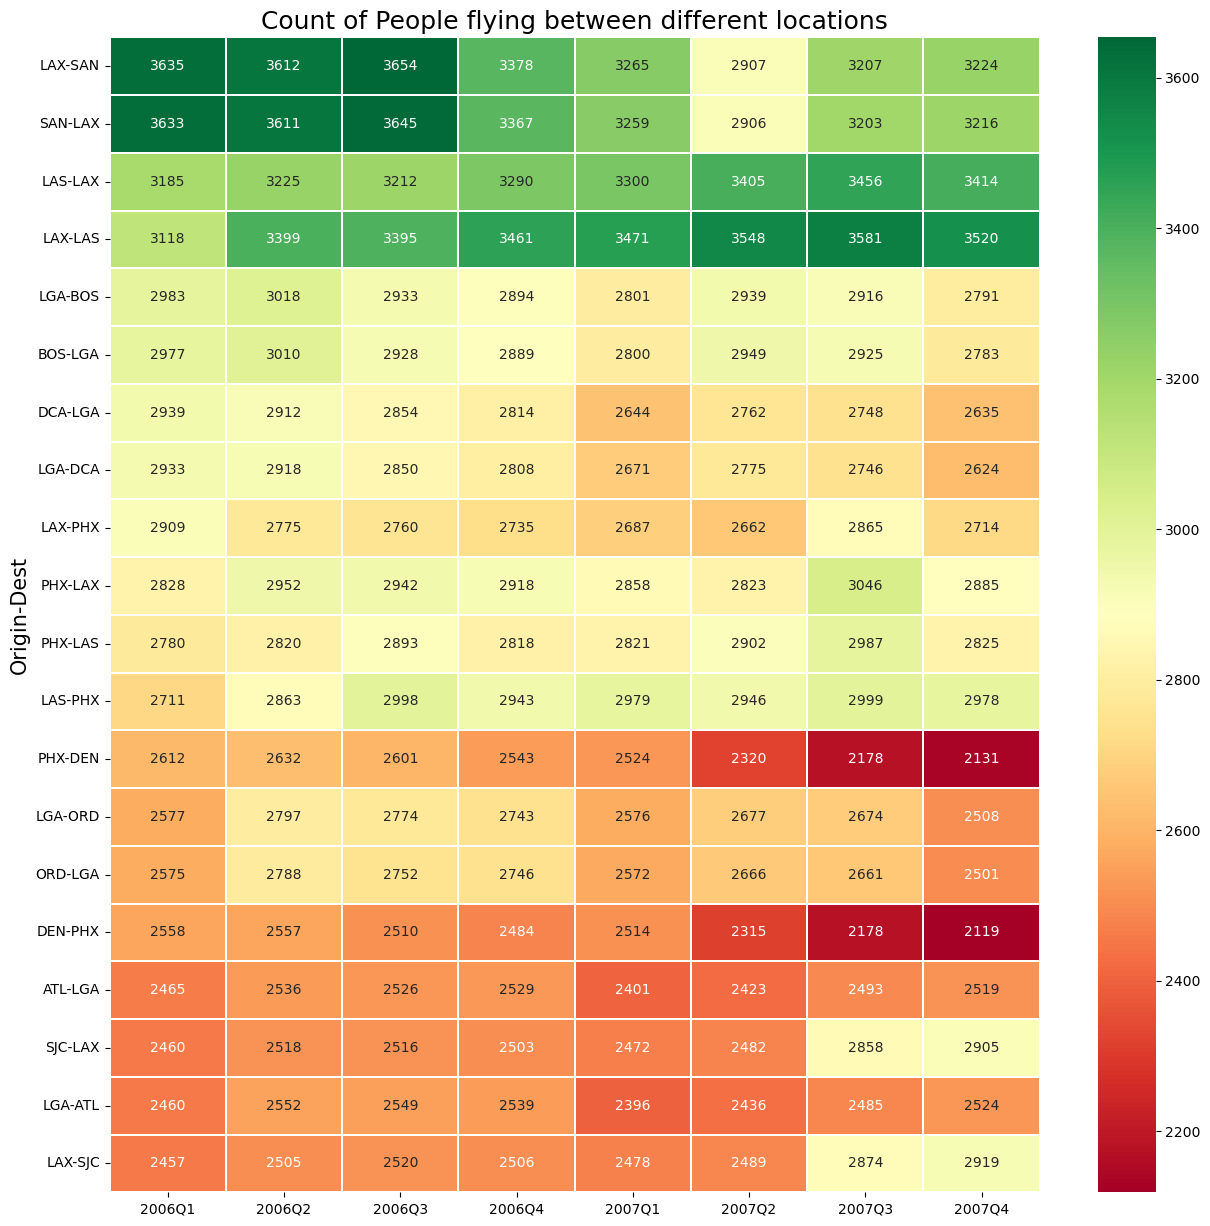

In [161]:
#defining the plot 
fig, ax = plt.subplots(1, 1, figsize = (15,15))
title = 'Count of People flying between different locations'
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])
ax.set_ylabel('Origin-Destination',size=15,)
ax.set_xlabel('Quarter',size=15)
sns.heatmap(top_20,annot=True,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)
